In [15]:
x = list(clip.parameters())
y = list(processor.parameters())

In [19]:
print(len(x))
print(len(y))
print(x[0].requires_grad)
print(y[0].requires_grad)


398
1
True
True


In [23]:
for param in y:
    if param.requires_grad == False:
        print("x")

In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = clip(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
print(logits_per_image)
print(probs)

/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([[24.5701, 19.3049]], grad_fn=<TBackward0>)
tensor([[0.9949, 0.0051]], grad_fn=<SoftmaxBackward0>)


In [2]:
import torch
import importlib
import loaders
import functools
import edit
import importlib
import taming.modules.vqvae.quantize
importlib.reload( taming.modules.vqvae.quantize)
importlib.reload(loaders)
from loaders import load_default

model = load_default()

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


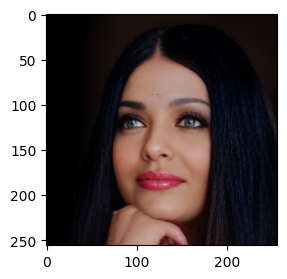

In [4]:
from latent_utils import *
x = get_latent_from_path("./women_aligned/1.png", model)
latent = get_latent_from_path("./test_data/face.jpeg", model)
y = get_latent_from_path("./women_aligned/2.png", model)
im_x = show_latent(model, x)
# im_y = show_latent(model, y)

In [16]:
inputs = processor(text=["a photo of a man", "a photo of a woman"], images=im_x, return_tensors="pt", padding=True)

outputs = clip(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities
target = torch.Tensor([1, 0])
print(logits_per_image)
print(logits_per_image.shape)
# print(probs)

tensor([[21.3020, 26.9550]], grad_fn=<TBackward0>)
torch.Size([1, 2])


In [9]:
target = torch.Tensor([1, 0])

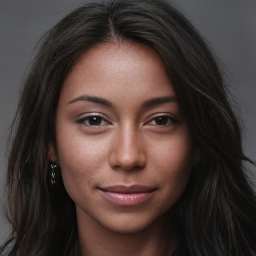

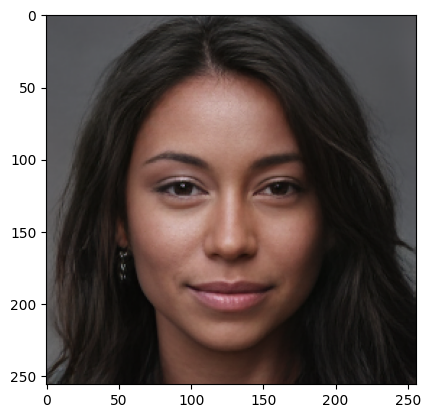

In [29]:
tvec = torch.randn_like(latent)
show_latent(model, latent + tvec)

In [11]:
print(target)
list(model.parameters())[0]

tensor([1., 0.])


/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646603923/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


Parameter containing:
tensor([[[[-0.0271, -0.0817, -0.0245],
          [-0.0578,  0.1683, -0.1521],
          [-0.0829,  0.1521,  0.0292]],

         [[-0.1696,  0.0395, -0.1698],
          [ 0.0776, -0.0182, -0.0392],
          [-0.1325, -0.1448, -0.0890]],

         [[-0.0770, -0.1535,  0.0035],
          [-0.1894, -0.1402, -0.1721],
          [-0.0425, -0.2505,  0.0984]]],


        [[[ 0.1634,  0.1822, -0.0661],
          [ 0.0231,  0.0087, -0.0592],
          [ 0.0915,  0.0836, -0.1222]],

         [[ 0.0276, -0.1258,  0.1188],
          [ 0.1588,  0.0606, -0.1313],
          [-0.0230,  0.1850, -0.0454]],

         [[ 0.0142, -0.1585, -0.0408],
          [-0.1272, -0.1748, -0.1181],
          [-0.0767,  0.1736,  0.1582]]],


        [[[ 0.1495,  0.1837,  0.1325],
          [-0.0178,  0.1582,  0.0566],
          [-0.0720,  0.0332,  0.1620]],

         [[ 0.0552,  0.0926,  0.1346],
          [ 0.1434, -0.0668, -0.0355],
          [ 0.1613,  0.2060,  0.0065]],

         [[ 0.2020,  0

In [ ]:
import torch.nn as nn
from img_processing import *
class TensorExtractor(nn.Module):
    def __init__(self, latent) -> None:
        super().__init__()
        #TODO tighter distribution
        self.latent = latent
        self.loss_fn = torch.nn.BCELoss()
        self.logits_loss = torch.nn.BCEWithLogitsLoss()
        self.optim = torch.optim.Adam([self.vector])
    def forward(self):
        trans_latent = self.latent + self.vector
        dec = model.decode(trans_latent.to("mps"))
        trans_im = custom_to_pil(dec[0])
        return trans_im, self.vector

def train(model):
    latent = get_latent_from_path("./test_data/face.jpeg", model)
    vector = torch.randn_like(latent)
    optim = torch.optim.Adam([self.vector])
    for i in range 100:
        trans_im, vector = 
        inputs = processor(text=["a photo of a man", "a photo of a woman"], images=trans_im, return_tensors="pt", padding=True)
        outputs = clip(**inputs)
        logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
        probs = logits_per_image.softmax(dim=1) 
        self.optim.zero_grad()
        loss = self.logits_loss(logits_per_image, target) 
        loss.backward()



        



In [26]:
import torch.nn as nn
from img_processing import *
from utils import freeze_module
import matplotlib.pyplot as plt
from tqdm import tqdm
class TensorExtractor(nn.Module):
    def __init__(self, latent, model) -> None:
        super().__init__()
        #TODO tighter distribution
        self.latent = latent
        model.eval()
        # freeze_module(model)
        self.model = model
        self.model.to_torchscript(method="trace", example_inputs=torch.ones((1, 3, 256, 256)))
        self.loss_fn = torch.nn.BCELoss()
        self.logits_loss = torch.nn.BCEWithLogitsLoss()
    def forward(self, vector):
        trans_latent = self.latent + vector
        dec = self.model.decode(trans_latent.to("mps"))
        # trans_im = custom_to_pil(dec[0])
        return dec
    def optimize(self):
        vector = torch.randn_like(latent, requires_grad=True)
        target = torch.tensor([[1., 0.]])
        self.optim = torch.optim.Adam([vector])
        intermediate = []
        for i in tqdm(range(40)):
            self.optim.zero_grad()
            trans_im = self(vector)
            if i % 10 == 0: 
                intermediate.append(trans_im)
                plt.figure(figsize=(3, 3))
                plt.imshow(custom_to_pil(trans_im[0]))
                plt.show()
            inputs = processor(text=["a photo of a man", "a photo of a woman"], images=trans_im, return_tensors="pt", padding=True)
            
            outputs = clip(**inputs)
            logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
            print(torch.autograd.grad(torch.mean(outputs.logits_per_image), inputs))
            # probs = logits_per_image.softmax(dim=1) 
            print(logits_per_image)
            loss = self.logits_loss(logits_per_image, target) 
            print(loss)
            loss.backward()
            self.optim.step()
        show_latent(self.model, self.latent + vector)
        return vector

ex = TensorExtractor(latent, model)
vec = ex.optimize()


# from torch.utils.tensorboard import SummaryWriter

# # default `log_dir` is "runs" - we'll be more specific here
# writer = SummaryWriter('runs/ex')
# tvec = torch.randn_like(latent)
# writer.add_graph(ex, tvec)
# writer.close()


        



/Users/erwann/dl/taming-transformers/taming/modules/diffusionmodules/model.py:181: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  w_ = w_ * (int(c)**(-0.5))
  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:

vec

In [ ]:
target = torch.tensor([[1., 0.]])

In [ ]:
target.dtype

torch.int64

In [ ]:
latent.shape

torch.Size([1, 256, 16, 16])

In [ ]:
model.eval()
x = next(model.parameters())
x

Parameter containing:
tensor([[[[-0.0271, -0.0817, -0.0245],
          [-0.0578,  0.1683, -0.1521],
          [-0.0829,  0.1521,  0.0292]],

         [[-0.1696,  0.0395, -0.1698],
          [ 0.0776, -0.0182, -0.0392],
          [-0.1325, -0.1448, -0.0890]],

         [[-0.0770, -0.1535,  0.0035],
          [-0.1894, -0.1402, -0.1721],
          [-0.0425, -0.2505,  0.0984]]],


        [[[ 0.1634,  0.1822, -0.0661],
          [ 0.0231,  0.0087, -0.0592],
          [ 0.0915,  0.0836, -0.1222]],

         [[ 0.0276, -0.1258,  0.1188],
          [ 0.1588,  0.0606, -0.1313],
          [-0.0230,  0.1850, -0.0454]],

         [[ 0.0142, -0.1585, -0.0408],
          [-0.1272, -0.1748, -0.1181],
          [-0.0767,  0.1736,  0.1582]]],


        [[[ 0.1495,  0.1837,  0.1325],
          [-0.0178,  0.1582,  0.0566],
          [-0.0720,  0.0332,  0.1620]],

         [[ 0.0552,  0.0926,  0.1346],
          [ 0.1434, -0.0668, -0.0355],
          [ 0.1613,  0.2060,  0.0065]],

         [[ 0.2020,  0

In [ ]:
t.shape

torch.Size([1, 2])

In [ ]:
vec = torch.randn_like(latent)
op = torch.optim.Adam([vec])
print(op)

Traceback (most recent call last):
  File "_pydevd_bundle/pydevd_cython.pyx", line 1134, in _pydevd_bundle.pydevd_cython.PyDBFrame.trace_dispatch
  File "_pydevd_bundle/pydevd_cython.pyx", line 311, in _pydevd_bundle.pydevd_cython.PyDBFrame.do_wait_suspend
  File "/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2062, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/taming/lib/python3.8/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2098, in _do_wait_suspend
    time.sleep(0.01)
KeyboardInterrupt


KeyboardInterrupt: 